In [2]:
import cv2
import matplotlib.pyplot as plt
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import mediapipe as mp
import numpy as np

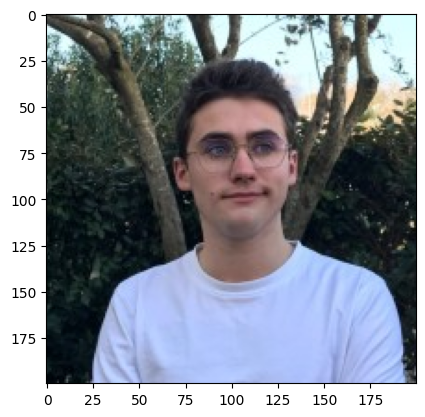

In [3]:
img = cv2.imread("photo.jpeg")[:,:,::-1]
plt.imshow(img)

In [4]:
mp_face_mesh = solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

I0000 00:00:1721936085.419297    4516 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1721936085.464377    4628 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) HD Graphics 620 (KBL GT2)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1721936085.497605    4620 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1721936085.511441    4619 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [5]:
landmarks = face_mesh.process(img)

/home/pqul/.local/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [6]:
landmarks.multi_face_landmarks

[landmark {
   x: 0.538545132
   y: 0.484473884
   z: -0.0331780687
 }
 landmark {
   x: 0.537925899
   y: 0.442961186
   z: -0.0621409342
 }
 landmark {
   x: 0.536440909
   y: 0.456393659
   z: -0.0332702361
 }
 landmark {
   x: 0.523421049
   y: 0.399739265
   z: -0.0465332977
 }
 landmark {
   x: 0.537159801
   y: 0.42920351
   z: -0.0657301173
 }
 landmark {
   x: 0.535031855
   y: 0.411409438
   z: -0.0608337745
 }
 landmark {
   x: 0.529079378
   y: 0.369317353
   z: -0.0282389037
 }
 landmark {
   x: 0.443288237
   y: 0.373951852
   z: 0.0101163145
 }
 landmark {
   x: 0.525813341
   y: 0.340508938
   z: -0.0193504486
 }
 landmark {
   x: 0.524752438
   y: 0.323291302
   z: -0.0210522134
 }
 landmark {
   x: 0.519270062
   y: 0.261161953
   z: -0.00595046766
 }
 landmark {
   x: 0.538827777
   y: 0.49024865
   z: -0.0316016525
 }
 landmark {
   x: 0.538678885
   y: 0.493678153
   z: -0.027874168
 }
 landmark {
   x: 0.538163364
   y: 0.494240761
   z: -0.0228962563
 }
 landmark

In [7]:

def draw_landmarks_on_face(image, landmarks, draw_tesselation=True, draw_contours=True, draw_irises=True):
    """
    image: np.ndarray of shape (W, H) or (W, H, 3)
    landmarks: np.ndarray of shape (L=478, d=3)
    """

    ## image should be BGR
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    annotated_image = np.copy(image)

    ## Put the landmarks in a normalized list
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
              landmark_pb2.NormalizedLandmark(x=x, y=y, z=z) for (x, y, z) in landmarks
            ])

    if draw_tesselation:
        ## FACE MESH TESSELATION
        solutions.drawing_utils.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks_proto,
            connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp.solutions.drawing_styles
            .get_default_face_mesh_tesselation_style())

    if draw_contours:
        ## FACE MESH CONTOURS
        solutions.drawing_utils.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks_proto,
            connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp.solutions.drawing_styles
            .get_default_face_mesh_contours_style())

    if draw_irises:
        ## FAC MESH IRISES
        solutions.drawing_utils.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks_proto,
            connections=mp.solutions.face_mesh.FACEMESH_IRISES,
              landmark_drawing_spec=None,
              connection_drawing_spec=mp.solutions.drawing_styles
              .get_default_face_mesh_iris_connections_style())

    return annotated_image
def extract_tesselation_landmarks(landmarks):
    """Returns the TESSELATION LANDMARKS"""
    ## get tesselation landmarks indices
    TESSELATION_INDICES = list(mp.solutions.face_mesh.FACEMESH_TESSELATION)
    TESSELATION_INDICES = np.unique(TESSELATION_INDICES)
    ## extract landmarks
    TESSELATION_landmarks = landmarks[TESSELATION_INDICES]
    return TESSELATION_landmarks

def extract_contours_landmarks(landmarks):
    """Returns the CONTOURS LANDMARKS"""
    ## get contours landmarks indices
    CONTOURS_INDICES = list(mp.solutions.face_mesh.FACEMESH_CONTOURS)
    CONTOURS_INDICES = np.unique(CONTOURS_INDICES)
    ## extract landmarks
    contours_landmarks = landmarks[CONTOURS_INDICES]
    return contours_landmarks

def extract_face_landmarks(landmarks):
    """Returns the IRISES LANDMARKS"""
    ## get irises landmarks indices
    facemesh_INDICES = list(mp.solutions.face_mesh.FACEMESH_FACE_OVAL)
    facemesh_INDICES = np.unique(facemesh_INDICES)
    ## extract landmarks
    facemesh_landmarks = landmarks[facemesh_INDICES]
    return facemesh_landmarks


def remove_face_landmarks(landmarks):
    """Remove face landmarks from contours landmarks"""
    contours_landmarks = extract_contours_landmarks(landmarks)
    face_landmarks = extract_face_landmarks(landmarks)
    indices_to_remove = np.where(np.isin(contours_landmarks, face_landmarks).all(axis=1))[0]
    filtered_contours_landmarks = np.delete(contours_landmarks, indices_to_remove, axis=0)
    return filtered_contours_landmarks

In [8]:
# Supposons que vous ayez déjà landmarks.multi_face_landmarks[0].landmark

# Transformation en liste de tuples (x, y, z)
landmark_list = [(landmark.x, landmark.y, landmark.z) for landmark in landmarks.multi_face_landmarks[0].landmark]

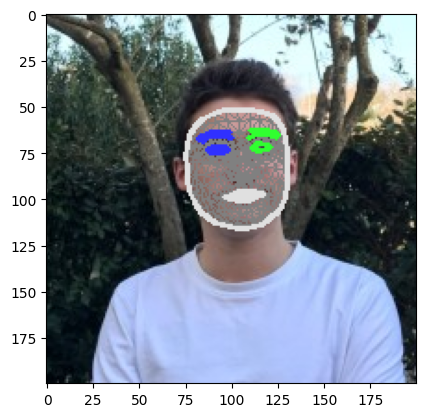

In [13]:
plt.imshow(draw_landmarks_on_face(img, landmark_list, draw_tesselation=True, draw_contours=True, draw_irises=False))

In [30]:
landmark_list_changed = np.array(landmark_list).reshape(len(landmark_list),-1)

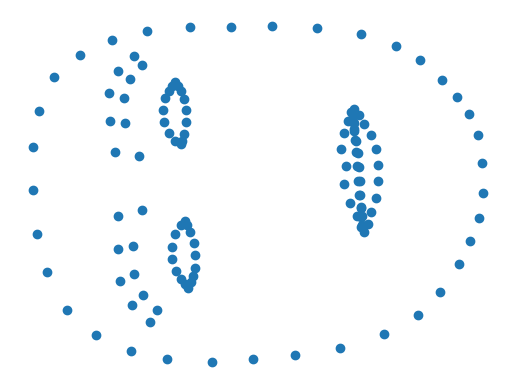

In [34]:
contours_landmarks = extract_contours_landmarks(landmark_list_changed)
plt.scatter(contours_landmarks[:, 1], contours_landmarks[:, 0])
plt.axis('off')
plt.show()

I0000 00:00:1721938059.410518    4516 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1721938059.449879    6622 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) HD Graphics 620 (KBL GT2)
W0000 00:00:1721938059.459013    6616 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1721938059.519467    6619 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/home/pqul/.local/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


(200, 200, 3)


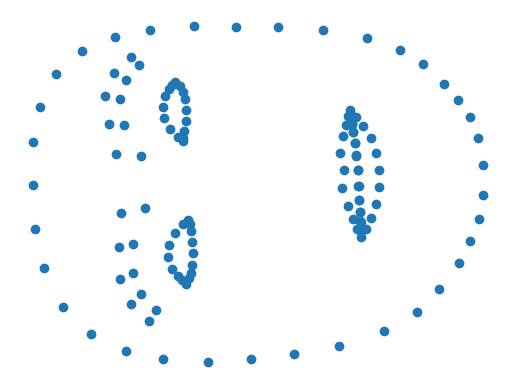

In [38]:
import cv2
import matplotlib.pyplot as plt
from mediapipe import solutions
import numpy as np

def extract_contours_landmarks(landmarks):
    """Returns the CONTOURS LANDMARKS"""
    CONTOURS_INDICES = list(solutions.face_mesh.FACEMESH_CONTOURS)
    CONTOURS_INDICES = np.unique(CONTOURS_INDICES)
    contours_landmarks = landmarks[CONTOURS_INDICES]
    return contours_landmarks

def process_image(image_path):
    mp_face_mesh = solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True)
    
    image = cv2.imread(image_path)
    print(image.shape)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image_rgb)
    
    if not results.multi_face_landmarks:
        raise ValueError("Aucun visage détecté dans l'image.")
    
    landmark_list = [(landmark.x, landmark.y, landmark.z) for landmark in results.multi_face_landmarks[0].landmark]
    landmark_list_changed = np.array(landmark_list).reshape(len(landmark_list), -1)
    
    return landmark_list_changed

def plot_contours(contours_landmarks):
    plt.scatter(contours_landmarks[:, 1], contours_landmarks[:, 0])
    plt.axis('off')
    plt.show()

def main(image_path):
    try:
        landmarks = process_image(image_path)
        contours_landmarks = extract_contours_landmarks(landmarks)
        plot_contours(contours_landmarks)
    except Exception as e:
        print(f"Une erreur s'est produite : {e}")

main("photo.jpeg")